# Implement SGD on Linear Regression

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

## [1] SKLEARN Implementation of SGD Regression

In [0]:
#Loading data
X = load_boston().data
Y = load_boston().target

In [0]:
#Preprocessing data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [72]:
#Regressor
clf = SGDRegressor()
clf.fit(X, Y)

#predictions
sklearn_sgd_predictions = clf.predict(X)

#Weights of Sklearn SGD
sklearn_sgd_weights = clf.coef_ 

#MeanSquareError
mse_sklearn = mean_squared_error(Y, clf.predict(X))
print("MSE for Implementation of SGD using SKLEARN is : ",mse_sklearn)

MSE for Implementation of SGD using SKLEARN is :  22.692765600576237


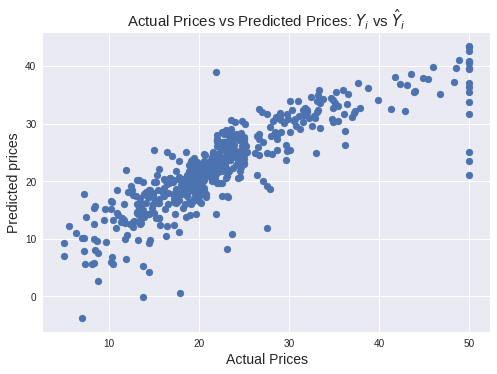

In [7]:
#Predictions with sklearnSGD
y_pred = clf.predict(X)

#Weights of Sklearn SGD
sklearn_sgd_weights = clf.coef_ 

#Scatter plot of Actual Prices vs Predicted Prices
plt.scatter(Y, y_pred)
plt.xlabel("Actual Prices",size=14)
plt.ylabel("Predicted prices",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=15)
plt.show()

## [2] SGD ON LINEAR REGRESSION FROM SCRATCH

In [0]:
#Loading data
X = load_boston().data
Y = load_boston().target

### Stochastic Gradient Descent Algorithm :

* Let 'K' be the number of random rows selected out of the dataset
* Initialize the weight vector
* Let r = learning_rate and m = number of training_examples
* repeat until convergence {
    weight[j] = weight[j] - (r/m)*((Σfrom i=1 to K)of(((weight.T * feature_data[i]) - target_price[i])* ### feature_data[i,j])
   r /= 2  
    }
* Final hypothesis for linear regression
* predicted_prices = (final_weights.T)*(test_data_matrix)

In [0]:
#Data preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#Creating X0 for ease in computation 
additional_feature = np.ones(X.shape[0])

#Stacking additional feature X0 which will be multiplied with W0
X = np.vstack((additional_feature,X.T)).T

In [0]:
#Train and Test split of data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [48]:
#Generating 14 normally distributed values
weights = np.random.normal(0,1,X.shape[1])

# Initialised Weights
weights

array([ 0.23762073,  0.15077456, -1.72733958, -0.19196418, -0.3084599 ,
       -1.01210014, -0.74880498,  0.32288871,  1.8594275 ,  0.50720855,
       -0.59417366,  0.08293002, -0.71699567,  0.53286371])

In [0]:
#Temporary vector to store intermediate computed weight values
temp_w = np.zeros(X.shape[1])

#Initialising learning rate
r = 0.001

#Number of training examples
m = X_train.shape[0]

#Batches for Stochastic Gradient Descent
batch_size = 20
from numpy import random
random_ids = random.choice(m,m,replace=False)
X_shuffled = X_train[random_ids,:]
y_shuffled = Y_train[random_ids]
mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]

#Iterations for training the data
iterations = 1000

#SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        for j in range(0,X.shape[1]):
            temp_sum = 0
            for i in range(0,X_batch.shape[0]):
                temp_sum += (( (np.sum( scaler.inverse_transform(weights[1:14] * X_batch[i,1:])) + weights[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
            temp_w[j] = weights[j] - ((r/X_batch.shape[0])*temp_sum)
        weights = temp_w
    iterations -= 1 
    
#Weights of manual sgd
manual_sgd_weights = weights

In [0]:
#Predicting on X_test
manual_sgd_predictions = np.zeros(X.shape[0])
for itr in range(0,X.shape[0]):
    manual_sgd_predictions[itr] = np.sum(scaler.inverse_transform(weights[1:14]*X[itr,1:])) + weights[0]*X[itr,0]

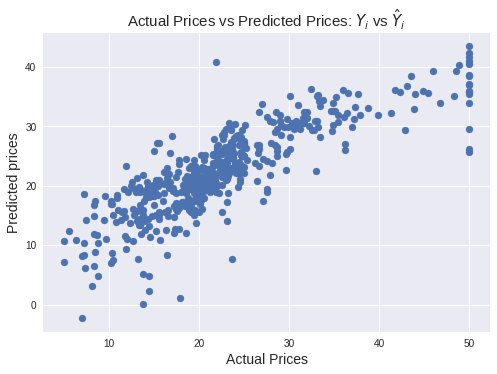

In [52]:
#Scatter plot of Actual Price VS Predicted Price
plt.scatter(Y, manual_sgd_predictions)
plt.xlabel("Actual Prices",size=14)
plt.ylabel("Predicted prices",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=15)
plt.show()

In [63]:
#MeanSquareError
mse = mean_squared_error(Y, manual_sgd_predictions)
print("MSE for Implementation of SGD using SKLEARN is : ",mse)

MSE for Implementation of SGD using SKLEARN is :  25.239954519242932


## Comparing the weights, predictions and MSE produced by both Manual SGD and Sklearn's SGD

In [56]:
x = PrettyTable()

x.add_column("Weights of Manual SGD",manual_sgd_weights)
x.add_column("Weights of Sklearn SGD",sklearn_sgd_weights)

#Printing the Table
print(x)

+-----------------------+------------------------+
| Weights of Manual SGD | Weights of Sklearn SGD |
+-----------------------+------------------------+
|   -888.4797145046437  |   11.266964501753474   |
|  -0.07714995288213704 |  -0.7248308869143211   |
|  0.055676096893567936 |   0.6073241652321884   |
|  -0.07095342793563283 |  -0.45890985412641233  |
|   4.279298667635577   |   0.7098453221186329   |
|   5.054413022546516   |  -1.0470068035988411   |
|   3.0741667365764545  |   3.229645950782115    |
| -0.005098095827449318 |  -0.2815132021372411   |
|  -1.1110715113185203  |   -2.146709507072771   |
|  0.21883072547497384  |   0.7789444673914973   |
| -0.007651709954114725 |  -0.42134929509482877  |
|  -0.6615470169474117  |   -1.922152454685072   |
|  0.005207767448989521 |   0.9255841566689437   |
|  -0.6664753131104216  |   -3.361027680894516   |
+-----------------------+------------------------+


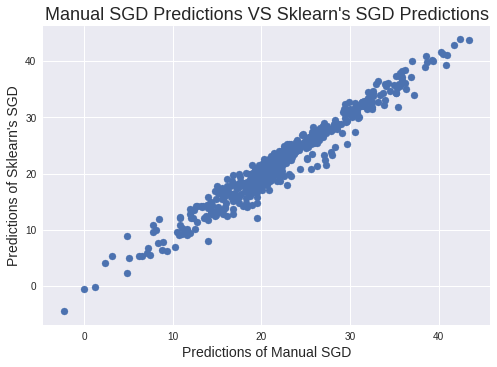

In [73]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.scatter(manual_sgd_predictions, sklearn_sgd_predictions)
plt.xlabel("Predictions of Manual SGD",size=14)
plt.ylabel("Predictions of Sklearn's SGD",size=14)
plt.title("Manual SGD Predictions VS Sklearn's SGD Predictions",size=18)
plt.show()

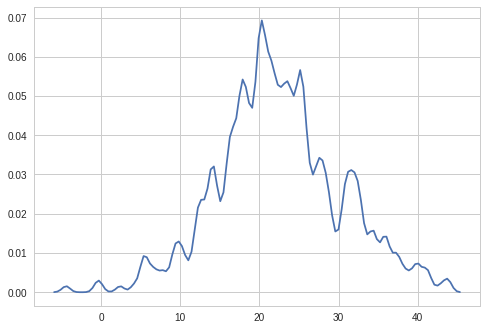

In [79]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

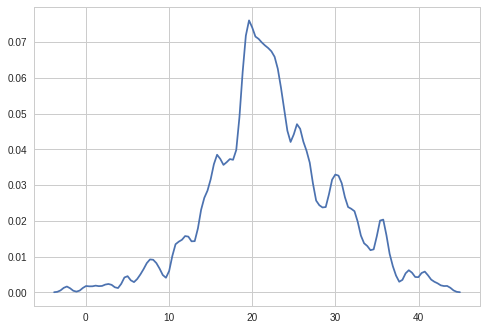

In [77]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(manual_sgd_predictions), bw=0.5)
plt.show()

In [71]:
y = PrettyTable()

y.field_names = ["SGD", "MSE_VALUE"]
y.add_row(["MSE for Implementation of SGD using SKLEARN",22.722])
y.add_row(["MSE for Implementation of SGD from scratch",25.239])

#Printing the Table
print(y)

+---------------------------------------------+-----------+
|                     SGD                     | MSE_VALUE |
+---------------------------------------------+-----------+
| MSE for Implementation of SGD using SKLEARN |   22.722  |
|  MSE for Implementation of SGD from scratch |   25.239  |
+---------------------------------------------+-----------+


## Conclusion

1. There is very little diffference between both the MSE.
2. Both the implementation are predicting mostly similar results. 